In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler   
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
from scipy.stats import uniform, loguniform
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-whitegrid")


In [3]:
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import tree
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier, BaggingClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')


In [4]:
data_path="archive/parkinsons.csv"

In [5]:
data=pd.read_csv(data_path)

In [6]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [7]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='str')

In [8]:
data.shape

(195, 24)

In [9]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    str    
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 17  status  

In [10]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [11]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [12]:
#status=1. have parkinson's else dont
data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [13]:
data.select_dtypes(include='number').groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [14]:
X=data.drop(columns=['name','status'])

In [15]:
y=data['status']

In [16]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [20]:
data_copy=data.copy()
data_copy=data_copy.sort_index(axis=1)
data_copy.info()

<class 'pandas.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   D2                195 non-null    float64
 1   DFA               195 non-null    float64
 2   HNR               195 non-null    float64
 3   Jitter:DDP        195 non-null    float64
 4   MDVP:APQ          195 non-null    float64
 5   MDVP:Fhi(Hz)      195 non-null    float64
 6   MDVP:Flo(Hz)      195 non-null    float64
 7   MDVP:Fo(Hz)       195 non-null    float64
 8   MDVP:Jitter(%)    195 non-null    float64
 9   MDVP:Jitter(Abs)  195 non-null    float64
 10  MDVP:PPQ          195 non-null    float64
 11  MDVP:RAP          195 non-null    float64
 12  MDVP:Shimmer      195 non-null    float64
 13  MDVP:Shimmer(dB)  195 non-null    float64
 14  NHR               195 non-null    float64
 15  PPE               195 non-null    float64
 16  RPDE              195 non-null    float64
 17  Shimmer:

In [23]:
mdvp=data_copy.iloc[:,5:15]
mdvp.head()

,MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Fo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:PPQ,MDVP:RAP,MDVP:Shimmer,MDVP:Shimmer(dB),NHR
0,157.302,74.997,119.992,0.00784,0.00007,0.00554,0.00370,0.04374,0.426,0.02211
1,148.650,113.819,122.400,0.00968,0.00008,0.00696,0.00465,0.06134,0.626,0.01929
2,131.111,111.555,116.682,0.01050,0.00009,0.00781,0.00544,0.05233,0.482,0.01309
3,137.871,111.366,116.676,0.00997,0.00009,0.00698,0.00502,0.05492,0.517,0.01353
4,141.781,110.655,116.014,0.01284,0.00011,0.00908,0.00655,0.06425,0.584,0.01767


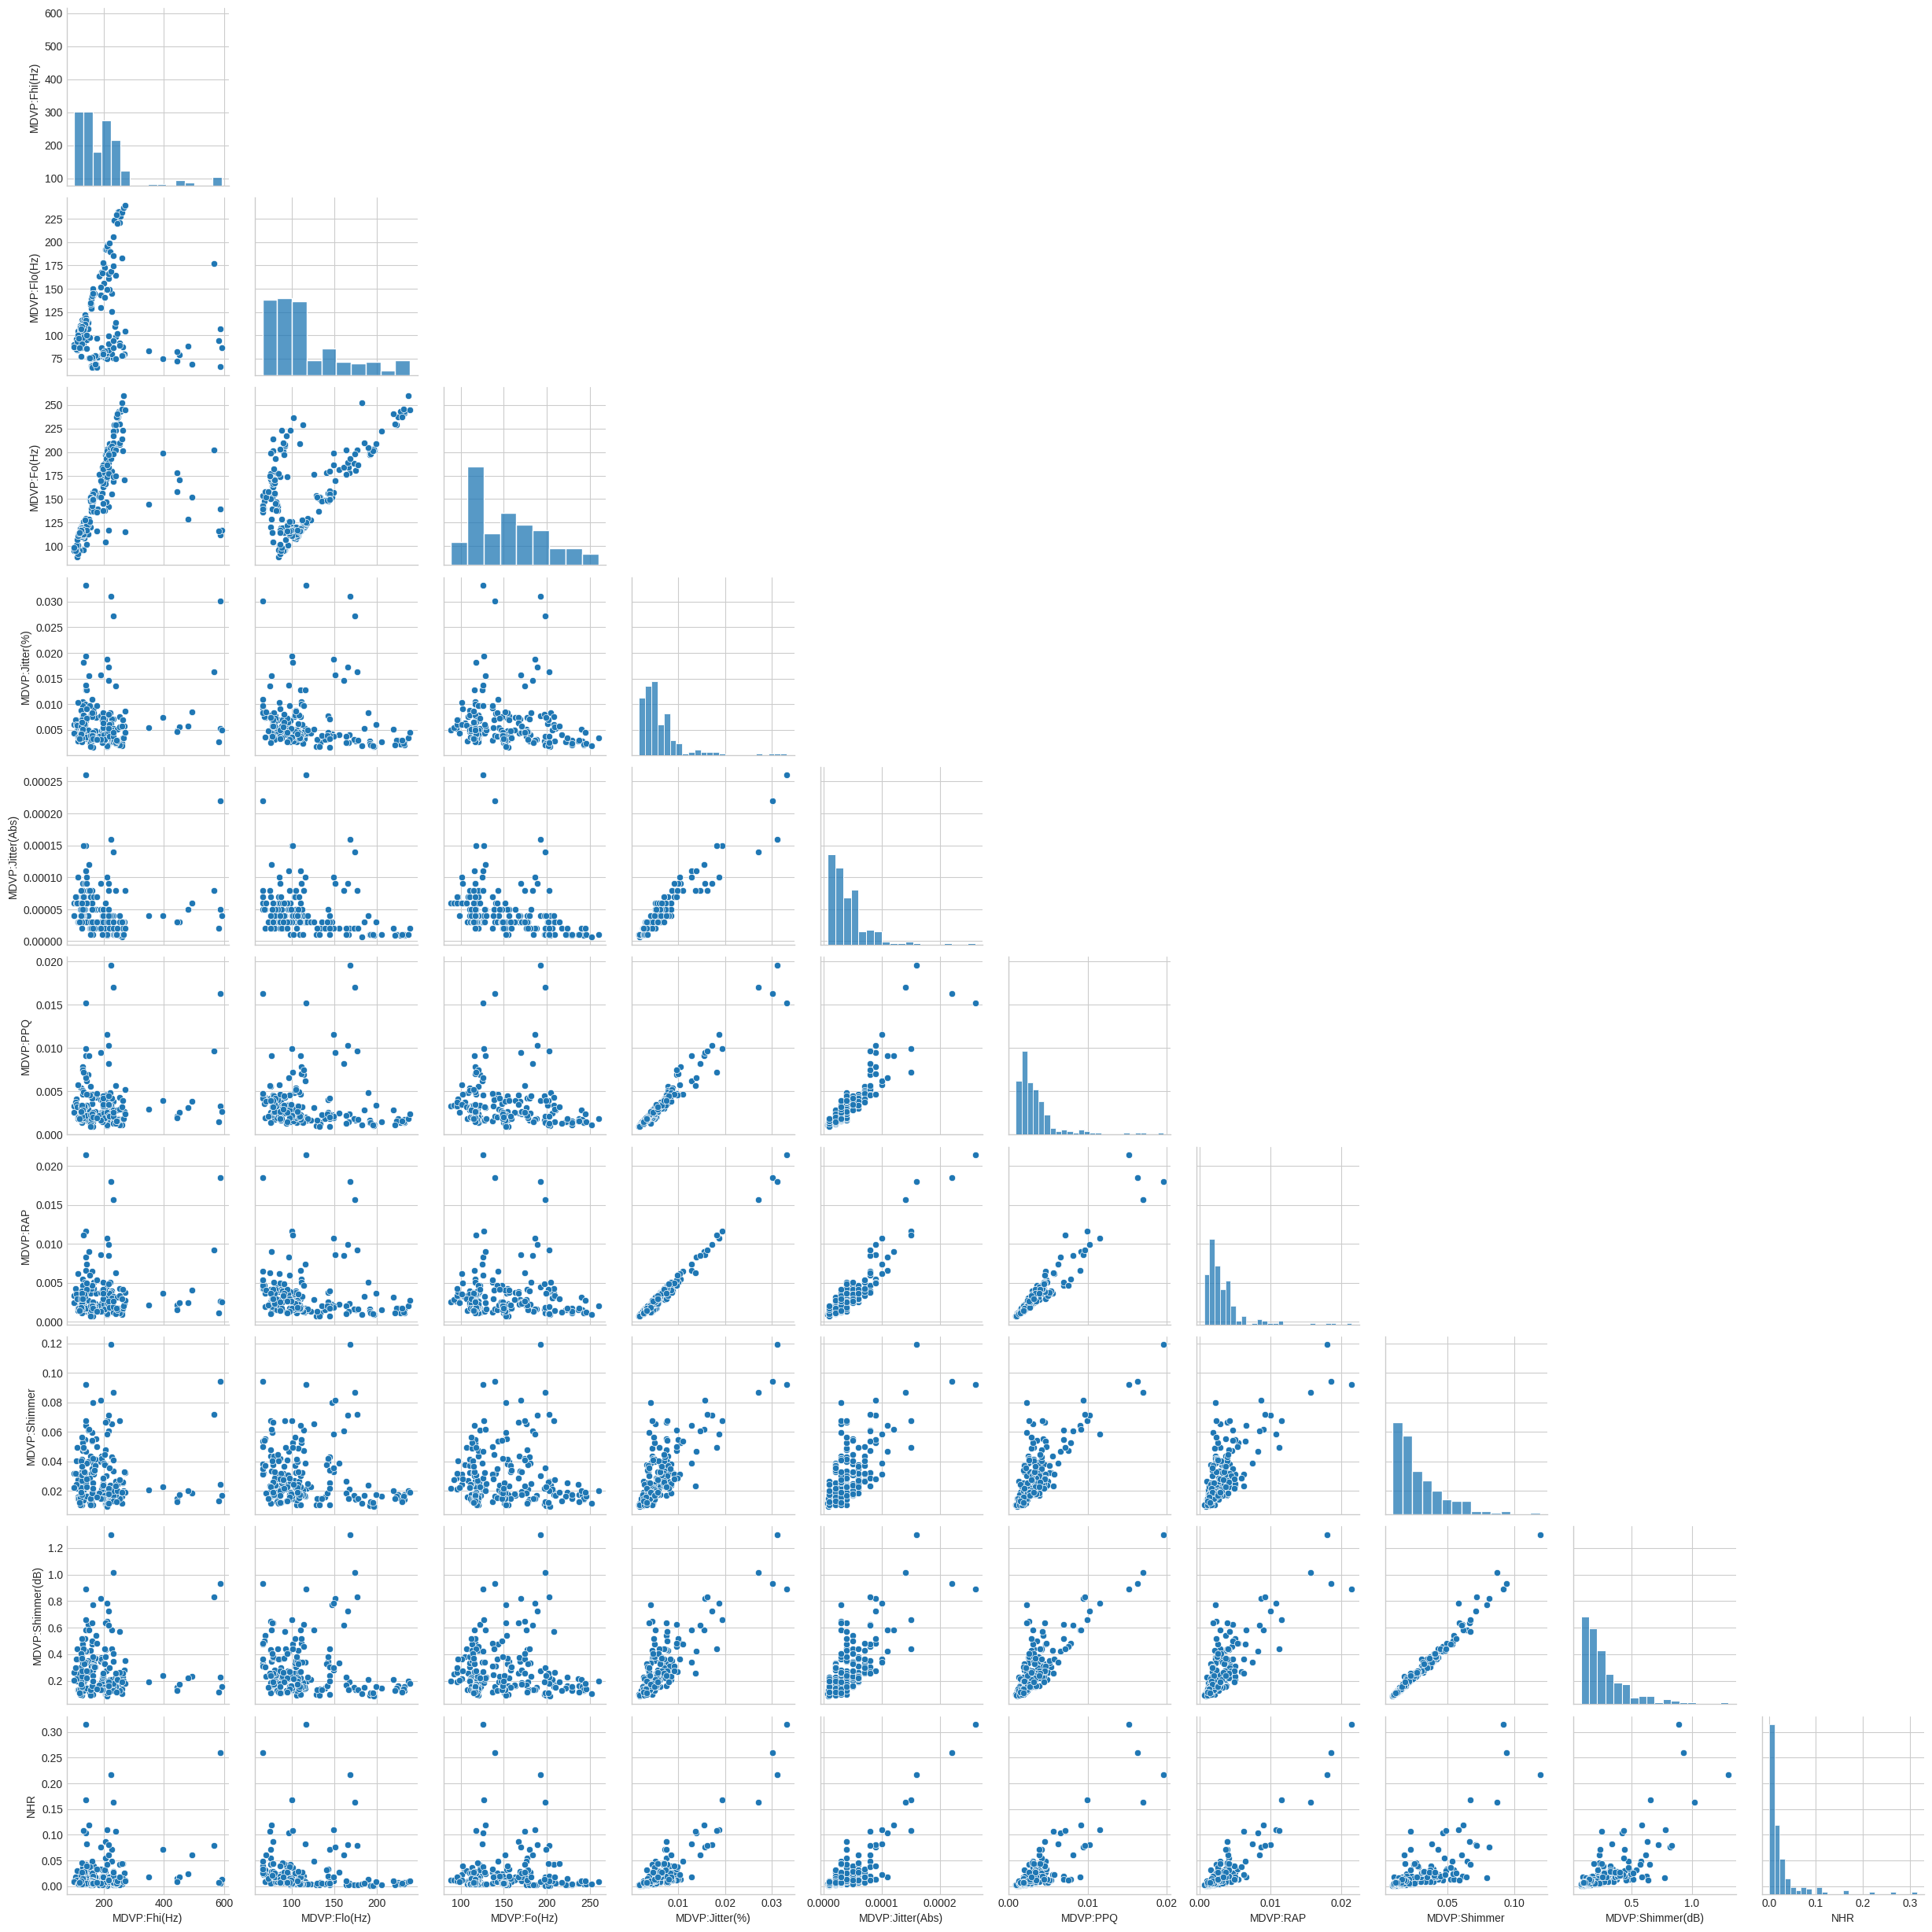

In [24]:
pairplot = sns.pairplot(mdvp)

axes = pairplot.axes

# mask the upper triangle for simplicity
for i, j in zip(*np.triu_indices_from(axes, 1)):
    axes[i, j].set_visible(False)

plt.show()

In [25]:
#Checking for linear relation
# [RAP & Jitter(%)] and [Shimmer & Shimmer(dB)] almost have a perfect linear relation 
#making a linear regression to see if we can predict a linear relation

def check_linear_relation(feature, label):
  temp = data_copy.dropna()
  X = temp[feature]
  y = temp[label]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LinearRegression()
  model.fit(X_train, y_train)

  # predict on the test set
  y_pred = model.predict(X_test)

  # calculate R-squared
  r2 = r2_score(y_test, y_pred)
  print(feature, label)
  print("R-squared:", r2)

  # print eq
  print("Equation y={0:.4f}*x + {1:.4f}".format(model.coef_[0][0], model.intercept_[0]))

  impute_df = pd.DataFrame()
  impute_df['org'] = y
  impute_df['pre'] = model.predict(X)
  sns.regplot(impute_df, x='org', y='pre', line_kws=dict(color="r"))
  plt.show()

  return model.coef_[0][0], model.intercept_[0]

['MDVP:Jitter(%)'] ['MDVP:RAP']
R-squared: 0.9247059209347499
Equation y=0.6084*x + -0.0005


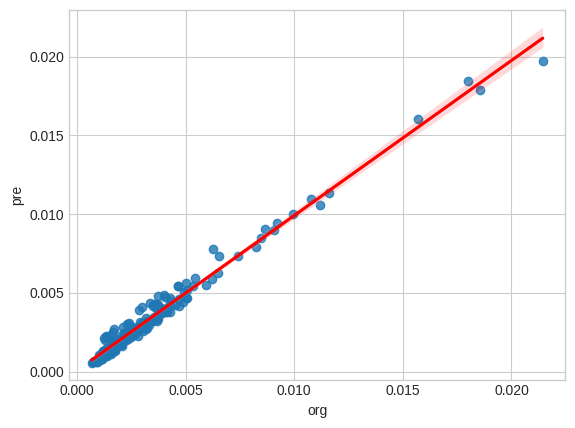

In [26]:
coef, inter = check_linear_relation(['MDVP:Jitter(%)'], ['MDVP:RAP'])

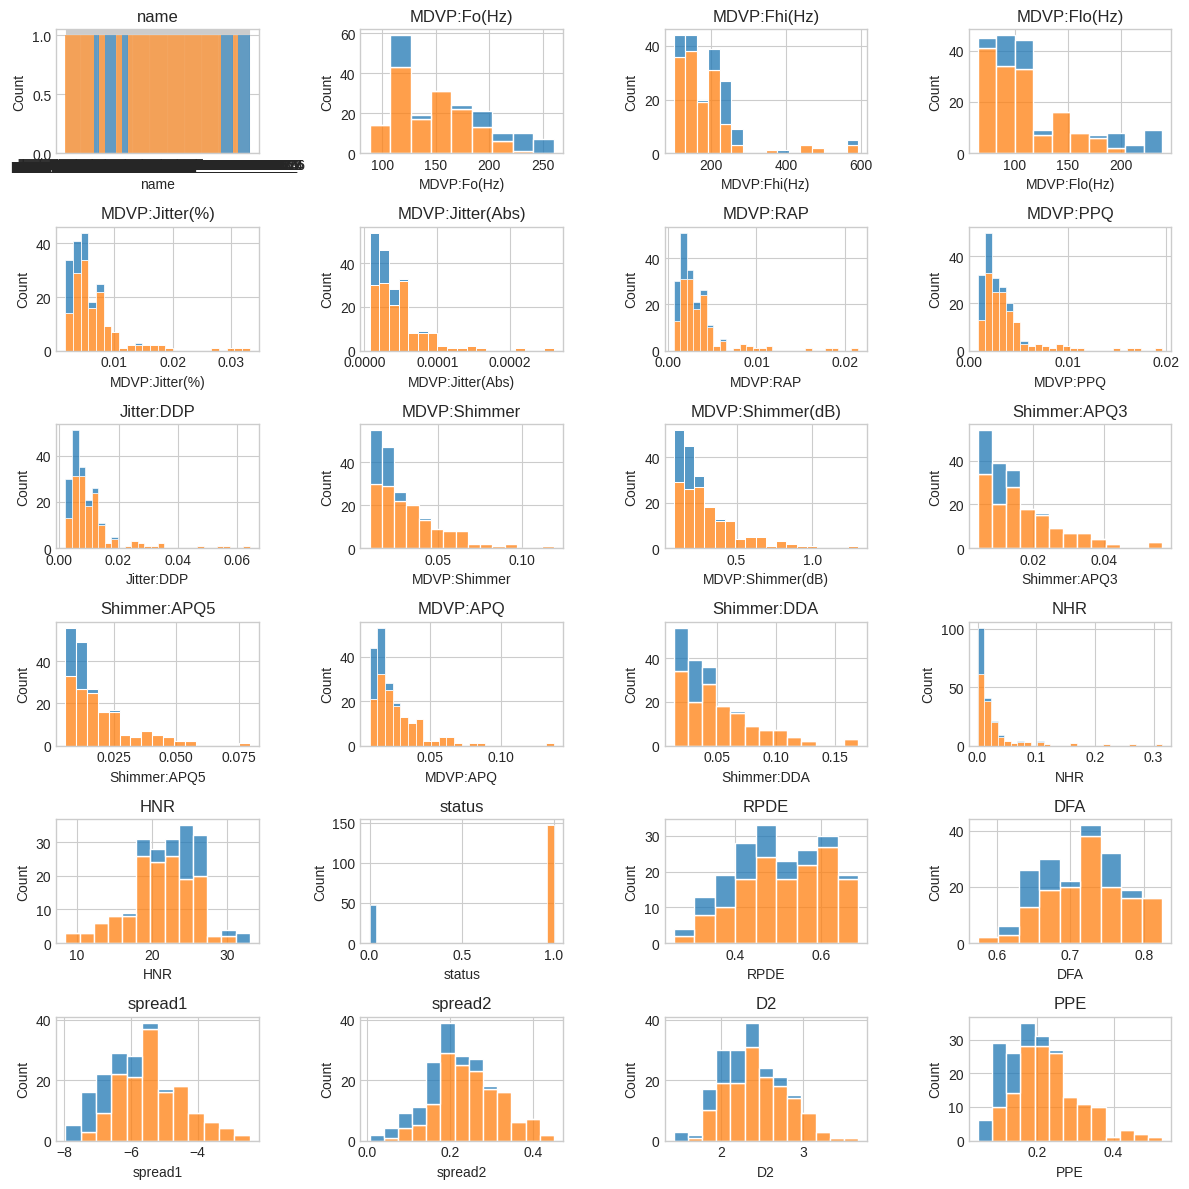

<Figure size 640x480 with 0 Axes>

In [28]:
# view data distribution

fig, axes = plt.subplots(6, 4, figsize=(12, 12))

for i, col in enumerate(data.columns):
    row = i // 4
    col_num = i % 4
    sns.histplot(data=data, x=col, ax=axes[row, col_num], hue='status', multiple='stack', legend=False) #off legend for visbility; the more common color would be True(status 1)
    axes[row, col_num].set_title(col)

plt.tight_layout()
plt.show()
plt.savefig("feature_distribution.jpg")

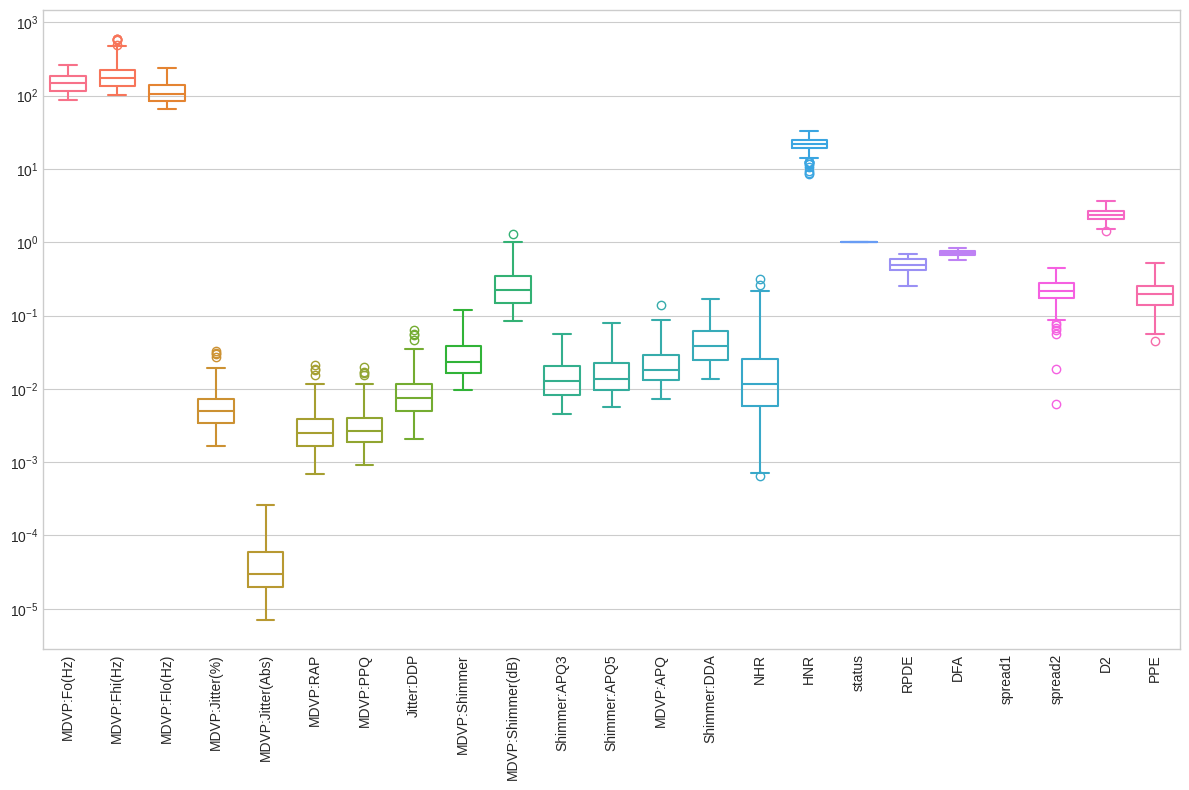

In [29]:
# it seems most features (Shimmer, APQ, DDA) are skewed to the right
# while some (spread2, D2, PPE) have low normal distribution
# and some columns have visible outliers

fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data, log_scale=True, fill=False, gap=.1, ax=ax)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

PCA

In [41]:
df=data.drop(columns=['name'])

In [42]:
feature_cols=[x for x in df.columns if x!='status']
start_shuff_split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
train_idx,test_idx=next(start_shuff_split.split(data[feature_cols],data['status']))

# create the data sets
X_train = df.loc[train_idx, feature_cols]
y_train = df.loc[train_idx, 'status']

X_test = df.loc[test_idx, feature_cols]
y_test = df.loc[test_idx, 'status']

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

status
1    0.757353
0    0.242647
Name: proportion, dtype: float64
status
1    0.745763
0    0.254237
Name: proportion, dtype: float64


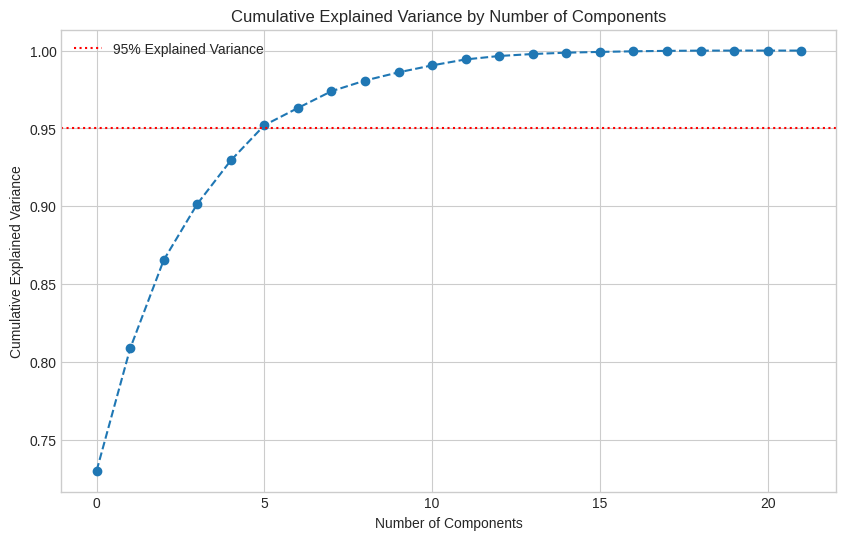

In [43]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# perform PCA only on train set to prevent data leakage
# raw pca to get a rough idea of explained variance ratio
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.axhline(y=0.95, color='r', linestyle=':', label='95% Explained Variance')
plt.legend()
plt.show()

In [44]:
pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print("Total explained variance ratio:", np.sum(pca.explained_variance_ratio_).round(3))
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Total explained variance ratio: 0.952
Shape of X_train: (136, 6)
Shape of X_test: (59, 6)


In [49]:
X_train_df = pd.DataFrame(X_train)
pca_df = pd.concat([X_train_df, y_train], axis=1)
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','status']
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,status
0,-2.749728,-0.058895,-1.100804,0.246669,-0.033156,-0.229084,1.0
1,1.532983,-1.223782,-0.154538,-1.141821,0.099133,0.527931,NaN
2,-1.649388,1.591675,0.326715,1.384510,0.592237,0.873008,1.0
3,-0.227112,-0.159197,0.046007,-0.056411,0.695108,0.167079,NaN
4,0.628857,-1.485772,-1.713013,0.598173,0.964637,-0.380811,1.0


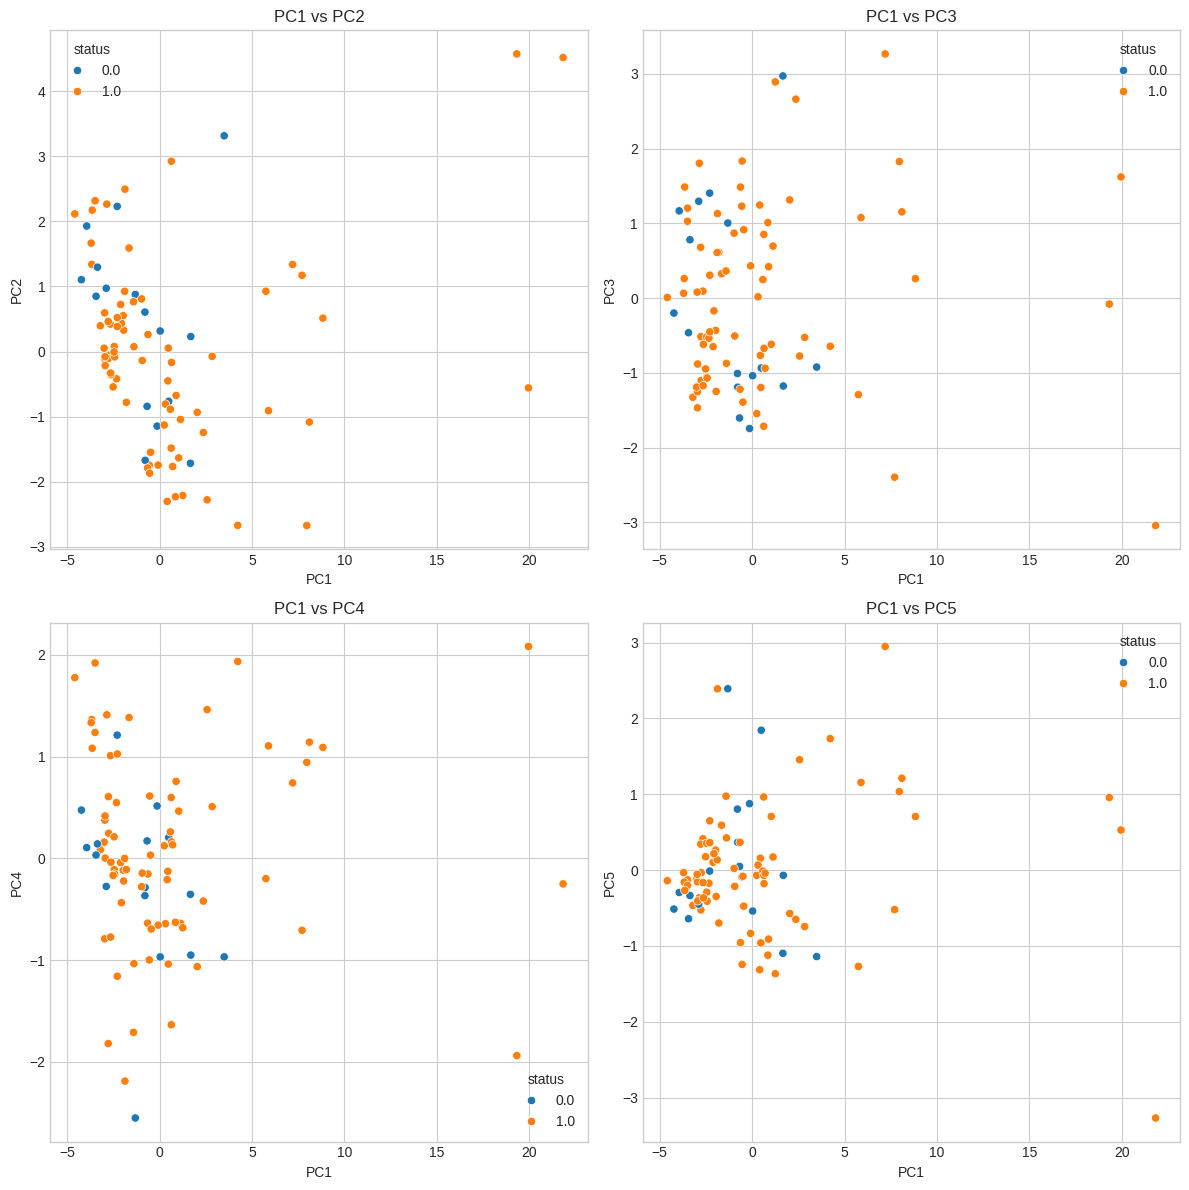

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
(ax1, ax2), (ax3, ax4) = axes

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='status', ax=ax1)
ax1.set_title('PC1 vs PC2')
sns.scatterplot(data=pca_df, x='PC1', y='PC3', hue='status', ax=ax2)
ax2.set_title('PC1 vs PC3')
sns.scatterplot(data=pca_df, x='PC1', y='PC4', hue='status', ax=ax3)
ax3.set_title('PC1 vs PC4')
sns.scatterplot(data=pca_df, x='PC1', y='PC5', hue='status', ax=ax4)
ax4.set_title('PC1 vs PC5')



plt.tight_layout()
plt.show()

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [54]:
print(X.shape,X_train.shape,X_test.shape)

(195, 22) (136, 22) (59, 22)


In [55]:
scaler=StandardScaler()

In [56]:
scaler.fit(X_train)

,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


In [57]:
X_train=scaler.transform(X_train)

In [58]:
X_test=scaler.transform(X_test)

In [59]:
print(X_train)

[[ 0.68218987  0.08415192  1.37724001 ... -0.18893445 -0.30386704
  -0.69718177]
 [ 1.15431412  0.17569689  1.77011185 ... -0.66798306 -0.71802175
  -1.4765997 ]
 [-0.96721823 -0.85540548 -0.47772438 ... -0.43652792 -1.34205815
  -0.29649718]
 ...
 [-0.10987732 -0.31756908  0.59416508 ... -1.71862055 -0.11723193
  -0.22418968]
 [-0.11307774 -0.41735676  0.42275157 ...  0.16235966  1.12995674
  -0.15794319]
 [-0.33435342  4.35305246 -1.20409446 ...  0.52821883  0.74593741
   2.51743425]]


# SVM

In [60]:
model1=svm.SVC(kernel='linear')

In [61]:
model1.fit(X_train,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [62]:
pred=model1.predict(X_train)

In [63]:
accuracy=accuracy_score(y_train,pred)

In [64]:
accuracy

0.9044117647058824

In [65]:
X_test_pred=model1.predict(X_test)

In [66]:
test_accuracy=accuracy_score(y_test,X_test_pred)

In [67]:
test_accuracy

0.864406779661017

# Decision treee

In [68]:
model2=tree.DecisionTreeClassifier(random_state=42)

In [69]:
model2.fit(X_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [70]:
y_pred=model2.predict(X_train)
y_pred_test=model2.predict(X_test)

In [71]:
accuracy=accuracy_score(y_train,y_pred)
test_accuracy=accuracy_score(y_test,y_pred_test)

In [72]:
accuracy

1.0

In [73]:
test_accuracy

0.864406779661017

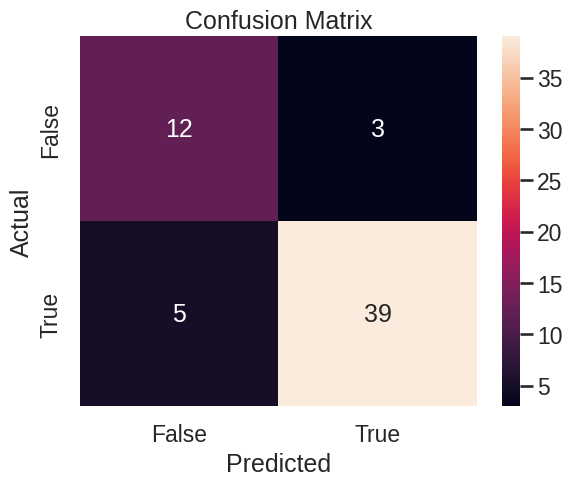

In [75]:
cm=confusion_matrix(y_test,y_pred_test)
sns.set_context('talk')
ax=sns.heatmap(cm,annot=True,fmt='d')
labels=['False','True']
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.title('Confusion Matrix')
plt.show()

In [76]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_test)

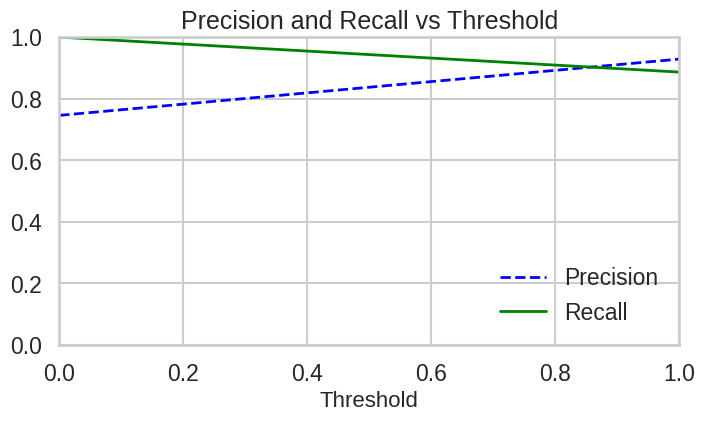

In [77]:
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel("Threshold", fontsize=16)
plt.legend(loc="upper left", fontsize=16)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("Precision and Recall vs Threshold")
plt.legend(loc='lower right')
plt.show()

In [78]:
def measure_error(y_true, y_pred, label):
  return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
  'precision': precision_score(y_true, y_pred),
  'recall': recall_score(y_true, y_pred),
  'f1': f1_score(y_true, y_pred)},
  name=label)

test_error = pd.concat([measure_error(y_test, y_pred_test, 'test')], axis=1)
test_error

,test
accuracy,0.864407
precision,0.928571
recall,0.886364
f1,0.906977


In [ ]:
import pickle

In [ ]:
pickle.dump(model1,open("svm_model.pkl","wb"))
pickle.dump(model2,open("decision_tree.pkl","wb"))